<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# the goal is to check if the distances matrix using 500 windows from each class makes sense:
# we will compare the average distance to the average inter and intra distance per group

In [4]:
# this is a similarity matrix - higher is closer
import gzip

In [1]:
indpath = r"C:\Data\HUJI\vcf\hgdp\indlist.csv"
i2c = dict()
with open(indpath) as f:
    for i,l in enumerate(f):
        i2c[i] = l.strip()
c2num_i = dict()
for v in i2c.values():
    if not v in c2num_i.keys():
        c2num_i[v] = 0
    c2num_i[v]+=1
c2num_i

{'Brahui': 25,
 'Balochi': 24,
 'Hazara': 19,
 'Makrani': 25,
 'Sindhi': 24,
 'Pathan': 24,
 'Kalash': 22,
 'Burusho': 24,
 'Mbuti': 13,
 'Biaka': 22,
 'Bougainville': 11,
 'French': 28,
 'PapuanSepik': 8,
 'PapuanHighlands': 9,
 'Druze': 42,
 'Bedouin': 46,
 'Sardinian': 28,
 'Palestinian': 46,
 'Colombian': 7,
 'Cambodian': 9,
 'Japanese': 27,
 'Han': 33,
 'Orcadian': 15,
 'Surui': 8,
 'Maya': 21,
 'Russian': 25,
 'Mandenka': 22,
 'Yoruba': 22,
 'Yakut': 25,
 'San': 6,
 'BantuSouthAfrica': 8,
 'Karitiana': 12,
 'Pima': 13,
 'Tujia': 9,
 'BergamoItalian': 12,
 'Tuscan': 8,
 'Yi': 10,
 'Miao': 10,
 'Oroqen': 9,
 'Daur': 9,
 'Mongolian': 9,
 'Hezhen': 9,
 'Xibo': 9,
 'Mozabite': 27,
 'NorthernHan': 10,
 'Uygur': 10,
 'Dai': 9,
 'Lahu': 8,
 'She': 10,
 'Naxi': 8,
 'Tu': 10,
 'Basque': 23,
 'Adygei': 16,
 'BantuKenya': 11}

In [2]:
import math

def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

In [5]:
rows = []
with gzip.open(r"C:\Data\HUJI\vcf\hgdp\classes\sanity_check\distances\mac_2-18_maf_1-49_windows_0-499_norm_dist.tsv.gz", 'rb') as f:
    i = 0
    for l in f.readlines():
        j = i + 1
        decoded = l.decode()
        dists = decoded.split(' ')
        print(len(dists))
        for d in dists:
            # The list to append as row
            ls = [i, j, float(d), i2c[i], i2c[j]]
            rows.append(ls)
            j+=1
        print(f'done {i}')
        i+=1


928
done 0
927
done 1
926
done 2
925
done 3
924
done 4
923
done 5
922
done 6
921
done 7
920
done 8
919
done 9
918
done 10
917
done 11
916
done 12
915
done 13
914
done 14
913
done 15
912
done 16
911
done 17
910
done 18
909
done 19
908
done 20
907
done 21
906
done 22
905
done 23
904
done 24
903
done 25
902
done 26
901
done 27
900
done 28
899
done 29
898
done 30
897
done 31
896
done 32
895
done 33
894
done 34
893
done 35
892
done 36
891
done 37
890
done 38
889
done 39
888
done 40
887
done 41
886
done 42
885
done 43
884
done 44
883
done 45
882
done 46
881
done 47
880
done 48
879
done 49
878
done 50
877
done 51
876
done 52
875
done 53
874
done 54
873
done 55
872
done 56
871
done 57
870
done 58
869
done 59
868
done 60
867
done 61
866
done 62
865
done 63
864
done 64
863
done 65
862
done 66
861
done 67
860
done 68
859
done 69
858
done 70
857
done 71
856
done 72
855
done 73
854
done 74
853
done 75
852
done 76
851
done 77
850
done 78
849
done 79
848
done 80
847
done 81
846
done 82
845
done 83
84

done 721
206
done 722
205
done 723
204
done 724
203
done 725
202
done 726
201
done 727
200
done 728
199
done 729
198
done 730
197
done 731
196
done 732
195
done 733
194
done 734
193
done 735
192
done 736
191
done 737
190
done 738
189
done 739
188
done 740
187
done 741
186
done 742
185
done 743
184
done 744
183
done 745
182
done 746
181
done 747
180
done 748
179
done 749
178
done 750
177
done 751
176
done 752
175
done 753
174
done 754
173
done 755
172
done 756
171
done 757
170
done 758
169
done 759
168
done 760
167
done 761
166
done 762
165
done 763
164
done 764
163
done 765
162
done 766
161
done 767
160
done 768
159
done 769
158
done 770
157
done 771
156
done 772
155
done 773
154
done 774
153
done 775
152
done 776
151
done 777
150
done 778
149
done 779
148
done 780
147
done 781
146
done 782
145
done 783
144
done 784
143
done 785
142
done 786
141
done 787
140
done 788
139
done 789
138
done 790
137
done 791
136
done 792
135
done 793
134
done 794
133
done 795
132
done 796
131
done 797
130

In [6]:
import pandas as pd
df = pd.DataFrame(rows, columns=['i', 'j', 's', 'ic', 'jc'])
df['same'] = df['ic'] == df['jc']
df

,i,j,s,ic,jc,same
0,0,1,0.153553,Brahui,Brahui,True
1,0,2,0.152413,Brahui,Brahui,True
2,0,3,0.153132,Brahui,Brahui,True
3,0,4,0.151417,Brahui,Brahui,True
4,0,5,0.154192,Brahui,Brahui,True
...,...,...,...,...,...,...
431051,925,927,0.141962,BantuKenya,BantuKenya,True
431052,925,928,0.123420,BantuKenya,BantuKenya,True
431053,926,927,0.122681,BantuKenya,BantuKenya,True
431054,926,928,0.135127,BantuKenya,BantuKenya,True


In [8]:
avg_s = df['s'].mean()
avg_s_inner = df[df['same']]['s'].mean()
avg_s_outer = df[~df['same']]['s'].mean()

print(f'avg s: {avg_s}')
print(f'avg s inner: {avg_s_inner}')
print(f'avg s outer: {avg_s_outer}')

avg s: 0.1275150429881019
avg s inner: 0.1312954762165802
avg s outer: 0.12742341920483527


In [9]:
samplesite2outeredges = dict()

for i,r in df[~df['same']].iterrows():
    s = r['s']
    ic = r['ic']    
    jc = r['jc']
    if not ic in samplesite2outeredges.keys():
        samplesite2outeredges[ic] = []
    samplesite2outeredges[ic].append(s)
    if not jc in samplesite2outeredges.keys():
        samplesite2outeredges[jc] = []
    samplesite2outeredges[jc].append(s)
    

In [10]:
import statistics

list_c_stats = []
for k in samplesite2outeredges.keys():
    l = samplesite2outeredges[k]
    list_c_stats.append([k, sum(l)/len(l), statistics.pstdev(l), len(l), min(l), max(l)])
list_c_stats
df_outer = pd.DataFrame(list_c_stats, columns=['ic', 's mean', 's std', 's count', 's min', 's max'])
df_outer.head()

,ic,s mean,s std,s count,s min,s max
0,Brahui,0.127104,0.008888,22600,0.120195,0.176580
1,Balochi,0.127230,0.008730,21720,0.120207,0.176299
2,Hazara,0.127630,0.006290,17290,0.120307,0.177410
3,Makrani,0.127661,0.005200,22600,0.120186,0.177410
4,Sindhi,0.127661,0.005921,21720,0.120298,0.174615


In [11]:
grouped_inner = df[df['same']].groupby(['ic']).agg({'s': ['mean', 'std', 'count', 'min', 'max']}).reset_index()
grouped_inner.columns = [' '.join(col).strip() for col in grouped_inner.columns.values]
grouped_inner.sort_values('s mean')

df_inner_vs_outer = pd.merge(grouped_inner, df_outer, on='ic', how='inner', suffixes=('_inner', '_outer'))
df_inner_vs_outer['mean diff'] = df_inner_vs_outer['s mean_inner'] - df_inner_vs_outer['s mean_outer']
df_inner_vs_outer.sort_values('mean diff')

,ic,s mean_inner,s std_inner,s count_inner,s min_inner,s max_inner,s mean_outer,s std_outer,s count_outer,s min_outer,s max_outer,mean diff
14,Daur,0.126323,0.004473,36,0.120778,0.137871,0.127489,0.005790,8280,0.120421,0.158412,-0.001166
13,Dai,0.126654,0.004657,36,0.121513,0.136867,0.127578,0.006055,8280,0.120664,0.175644,-0.000924
41,San,0.126964,0.004245,15,0.122142,0.133955,0.127557,0.005250,5538,0.120354,0.171902,-0.000593
3,BantuSouthAfrica,0.127330,0.004547,28,0.121172,0.142262,0.127525,0.004652,7368,0.120683,0.153424,-0.000195
32,NorthernHan,0.127406,0.008081,45,0.121478,0.171304,0.127574,0.006698,9190,0.120718,0.171564,-0.000168
6,BergamoItalian,0.127419,0.006324,66,0.121117,0.166130,0.127509,0.005651,11004,0.120218,0.166674,-0.000090
46,Tu,0.127528,0.008336,45,0.121135,0.161374,0.127582,0.007099,9190,0.120244,0.174560,-0.000054
2,BantuKenya,0.127599,0.008405,55,0.121606,0.154068,0.127570,0.007123,10098,0.120295,0.163009,0.000029
4,Basque,0.127758,0.006397,253,0.120729,0.161474,0.127577,0.006381,20838,0.120207,0.181741,0.000181
24,Makrani,0.127967,0.004674,300,0.122174,0.159593,0.127661,0.005200,22600,0.120186,0.177410,0.000305


In [12]:
print(df_inner_vs_outer['s max_inner'].max())
print(df_inner_vs_outer['s max_outer'].max())

0.17505023284725169
0.1817409650902587


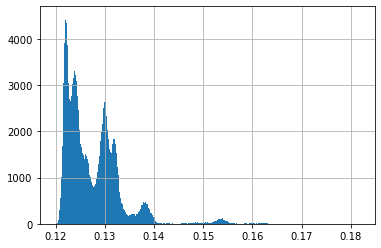

In [13]:
df['s'].hist(bins=1000)

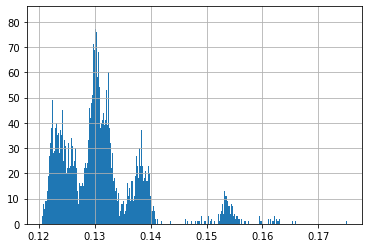

In [14]:
 df[df['same']]['s'].hist(bins=1000)

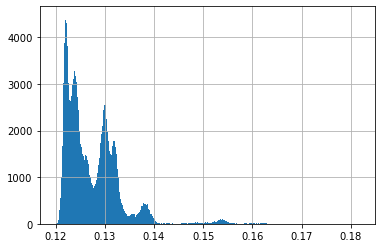

In [15]:
 df[~df['same']]['s'].hist(bins=1000)

In [23]:
df.sort_values(['s'], ascending=False).head(20)

,i,j,s,ic,jc,same
387072,631,901,0.181741,Karitiana,Basque,False
411232,729,806,0.179448,Miao,Mozabite,False
113025,130,901,0.178110,Pathan,Basque,False
119938,139,677,0.177935,Pathan,Sardinian,False
120162,139,901,0.177895,Pathan,Basque,False
112755,130,631,0.177683,Pathan,Karitiana,False
49569,55,70,0.177410,Hazara,Makrani,False
427774,847,887,0.177245,Lahu,Basque,False
399522,677,770,0.177223,Sardinian,Hezhen,False
2935,3,158,0.176580,Brahui,Kalash,False


In [29]:
i2c[632]

'Karitiana'

In [26]:
i2c[902]

'Adygei'

In [108]:

ind_id = 130
i_df = df[(df['i'] == ind_id) | (df['j'] == ind_id)].copy()
i_df['other'] = i_df['jc'] + i_df['ic']
i_df['other'] = i_df['other'].str.replace(i2c[ind_id],'')
i_grouped = i_df.groupby(['other']).agg({'d': ['mean', 'std', 'count', 'min', 'max']}).reset_index()
i_grouped.columns = [' '.join(col).strip() for col in i_grouped.columns.values]
print(i2c[ind_id])
i_grouped.sort_values('d mean')

Pathan


,other,d mean,d std,d count,d min,d max
10,Brahui,0.121909,0.003277,25,0.120195,0.133022
30,Mongolian,0.122198,0.000371,9,0.121689,0.122883
47,Tujia,0.122296,0.000610,9,0.121440,0.123454
35,Oroqen,0.122505,0.000434,9,0.121553,0.123034
27,Maya,0.122699,0.000671,21,0.121847,0.124258
45,Surui,0.123084,0.000902,8,0.122028,0.124653
48,Tuscan,0.123319,0.001592,8,0.120771,0.125661
18,Han,0.123344,0.000948,33,0.121517,0.125915
21,Japanese,0.124002,0.000857,27,0.122453,0.125439
2,Balochi,0.124160,0.009828,24,0.120480,0.167096


In [51]:
c2xandy = dict()
i=1
for c in c2num_i.keys():
    print(c)
    x = cors[cors['1'] == c]['x'].values[0]
    y = cors[cors['1'] == c]['y'].values[0]
    c2xandy[c] = (x,y)
    i+=1

Brahui
Balochi
Hazara
Makrani
Sindhi
Pathan
Kalash
Burusho
Mbuti


IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
lst = []
for i in i2c.keys():
    c = i2c[i]
    x = c2xandy[c][0]
    y = c2xandy[c][1]
    lst.append([c,i,x,y])

In [35]:
df_for_plot = pd.DataFrame(lst, columns=['c', 'i', 'x', 'y'])
df_for_plot

,c,i,x,y
0,Brahui,0,1,1
1,Brahui,1,1,1
2,Brahui,2,1,1
3,Brahui,3,1,1
4,Brahui,4,1,1
...,...,...,...,...
924,BantuKenya,924,54,54
925,BantuKenya,925,54,54
926,BantuKenya,926,54,54
927,BantuKenya,927,54,54


In [36]:
df_for_plot.to_csv(r'C:\Data\HUJI\vcf\hgdp\classes\sanity_check\netstruct\v2_mac_2-18_maf_1-49_windows_0-499\W_1_D_0_Min_3_SS_0.001_B_1.0\cor.csv', index=False)

In [49]:
corgili = pd.read_csv(r"C:\Data\HUJI\vcf\hgdp\H938_indlist_coords.csv", names = ['1','2','x','y'])
cg = corgili[['1','x','y']].copy()
cors = cg.groupby('1').first().reset_index()

34.57083904798857